# Examples Used in Paper.
## For clarity I want to look at just a few cases in the paper for clarity. By just looking at a few of the options I want to use the stars, 
### 2M00083980-7723438
### 2M00103667-7734335
### 2M00114619-7739374
### 2M00073970-7710053
### 2M00130351-7710411
### 2M00162435-7722021

In [166]:
#Read in the fits files for those objects,
from thejoker.data import RVData
from thejoker.plot import plot_rv_curves
from thejoker.sampler import compute_likelihoods
import astropy.units as u
import schwimmbad
from astropy.io import fits
from astropy.table import Table

from astropy.constants import G, sigma_sb

import os

import numpy as np
import matplotlib.pyplot as plt

iso = Table(fits.getdata('/home/cody/Binary Search/parsec_decamsdss_all.fits.gz',1))
AllAvgSimp = Table(fits.getdata('/home/cody/Binary Search/AllAvgSimp.fits',1))
AllVisSimp = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits',1))

Star1_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00083980-7723438/2M00083980-7723438.fits',1))
Star2_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00103667-7734335/2M00103667-7734335.fits',1))
Star3_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00114619-7739374/2M00114619-7739374.fits',1))
Star4_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00073970-7710053/2M00073970-7710053.fits',1))
Star5_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00130351-7710411/2M00130351-7710411.fits',1))
Star6_Samples = Table(fits.getdata('/home/cody/Binary Search/2M00162435-7722021/2M00162435-7722021.fits',1))

In [114]:
def Star_Vis(APOGEE_ID):
    AllVisSimp = Table(fits.getdata('/home/cody/Binary Search/AllVisSimp.fits',1))
    print(type(APOGEE_ID), APOGEE_ID)
    #I want the data for just those 5 objects,
    holder = []  # Holder array that I will apend the rows I want to keep
    for n in range(len(AllVisSimp)):
        for m in AllAvgSimp['APOGEE_ID']:
            if AllVisSimp['APOGEE_ID'][n] == APOGEE_ID:
                holder.append(n)
                break
    # 'holder' should be an array of all the rows in AllVisits, that had at least 5 visits. Now I want to remove
    # all of the other rows out of AllVisit.
    remove_AllVisSimp = []
    dumby_AllVisSimp = list(range(0,len(AllVisSimp))) #List of numbers from 0:len(AllVisit)
    for x in dumby_AllVisSimp:
        if x not in holder:
            remove_AllVisSimp.append(dumby_AllVisSimp[x]) #This will give me a list of all the rows I want to remove from AllVisit.
            
    # Now I have an array of rows I want to remove I want to do the same thing that I did for
    Star_foo_Vis = AllVisSimp
    Star_foo_Vis.remove_rows(remove_AllVisSimp)
    return Star_foo_Vis

In [148]:
Star1_Vis = Star_Vis('2M00083980-7723438')
Star2_Vis = Star_Vis('2M00103667-7734335')
Star3_Vis = Star_Vis('2M00114619-7739374')
Star4_Vis = Star_Vis('2M00073970-7710053')
Star5_Vis = Star_Vis('2M00130351-7710411')
Star6_Vis = Star_Vis('2M00162435-7722021')

<class 'str'> 2M00083980-7723438
[61, 62, 63, 64, 65, 66, 67]
             VISIT_ID              APRED_VERSION ... PMDEC PM_SRC
---------------------------------- ------------- ... ----- ------
apogee.lco25m.s.t9.10081.58025.292            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10081.58028.106            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10081.58053.285            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10081.58056.105            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10081.58061.105            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10123.58089.105            t9 ...   7.9   HSOY
apogee.lco25m.s.t9.10123.58092.105            t9 ...   7.9   HSOY
<class 'str'> 2M00103667-7734335
[132, 133, 134, 135, 136]
             VISIT_ID              APRED_VERSION ... PMDEC PM_SRC
---------------------------------- ------------- ... ----- ------
apogee.lco25m.s.t9.10081.58025.278            t9 ...   4.6  NOMAD
apogee.lco25m.s.t9.10081.58028.113            t9 ...   4.6  NOMAD
apogee.lco25m.s.t9.10

In [149]:
#Read in the dates that the object was observed on
Date1 = Star1_Vis['JD'] - Star1_Vis['JD'][0]
Date2 = Star2_Vis['JD'] - Star2_Vis['JD'][0]
Date3 = Star3_Vis['JD'] - Star3_Vis['JD'][0]  
Date4 = Star4_Vis['JD'] - Star4_Vis['JD'][0]
Date5 = Star5_Vis['JD'] - Star5_Vis['JD'][0]
Date6 = Star6_Vis['JD'] - Star6_Vis['JD'][0]
#Radial velocities that the object was observed to have with the units on km/s
RV1 = Star1_Vis['VHELIO']* u.km/u.s
RV2 = Star2_Vis['VHELIO']* u.km/u.s
RV3 = Star3_Vis['VHELIO']* u.km/u.s
RV4 = Star4_Vis['VHELIO']* u.km/u.s
RV5 = Star5_Vis['VHELIO']* u.km/u.s
RV6 = Star6_Vis['VHELIO']* u.km/u.s
#Error each individual measurment
err1 = Star1_Vis['VRELERR'] * u.km/u.s
err2 = Star2_Vis['VRELERR'] * u.km/u.s
err3 = Star3_Vis['VRELERR'] * u.km/u.s
err4 = Star4_Vis['VRELERR'] * u.km/u.s
err5 = Star5_Vis['VRELERR'] * u.km/u.s
err6 = Star6_Vis['VRELERR'] * u.km/u.s

data1 = RVData( t = Date1, rv = RV1, stddev = err1)
data2 = RVData( t = Date2, rv = RV2, stddev = err2)
data3 = RVData( t = Date3, rv = RV3, stddev = err3)
data4 = RVData( t = Date4, rv = RV4, stddev = err4)
data5 = RVData( t = Date5, rv = RV5, stddev = err5)
data6 = RVData( t = Date6, rv = RV6, stddev = err6)

In [235]:
type(data1)

thejoker.data.RVData

<class 'matplotlib.axes._subplots.AxesSubplot'>


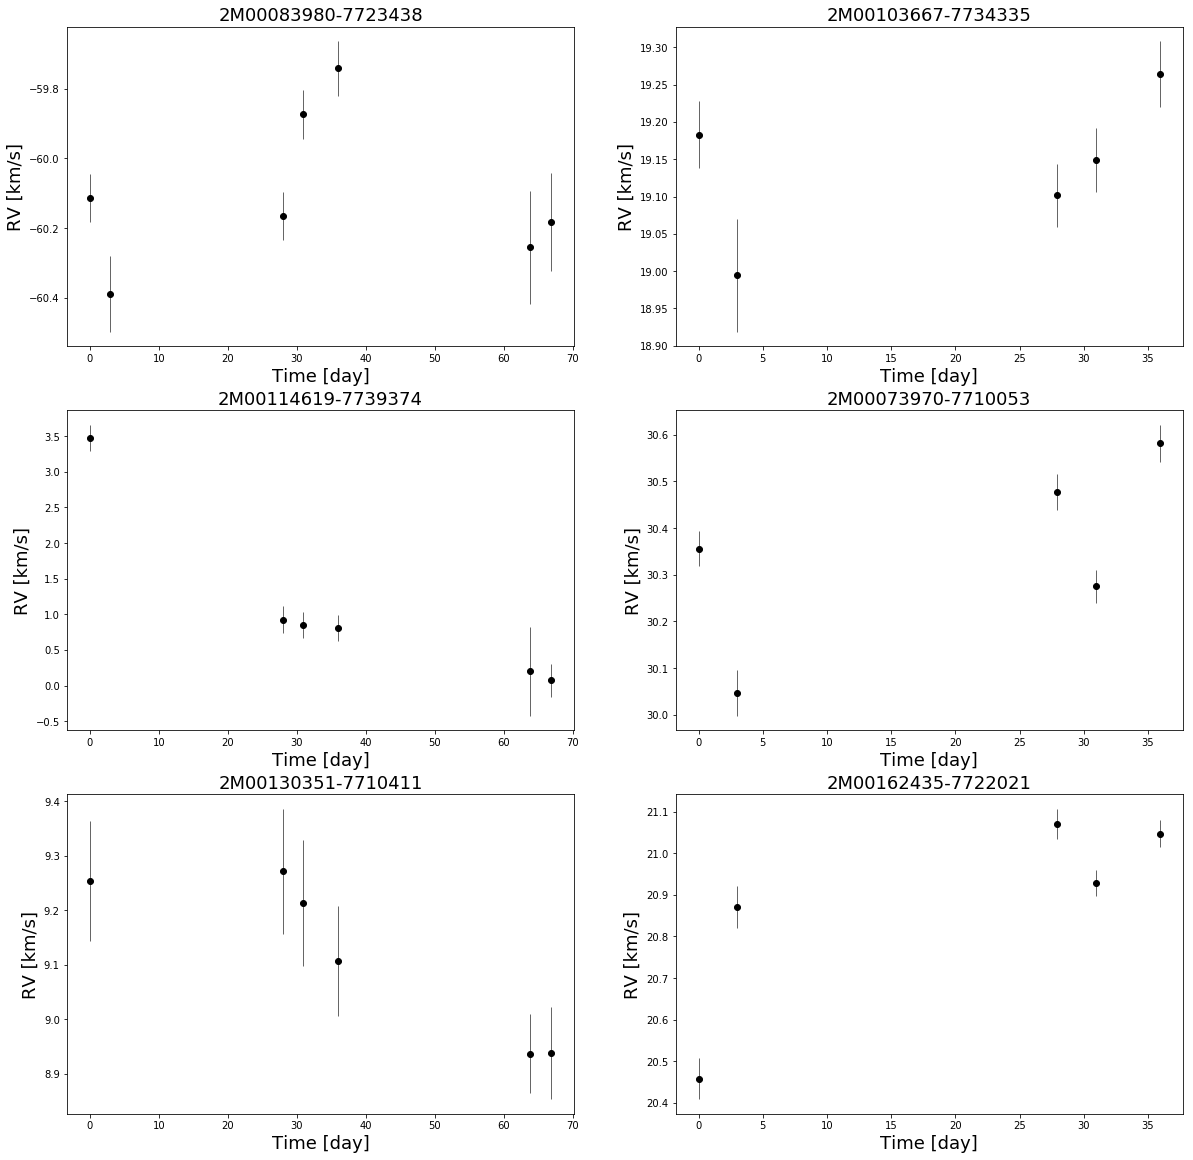

In [237]:
#This makes a plot of the observed data. Odds are I'll want to get rid of this eventually but for now I keep it 
#in becasue I'm afriad to deleate things I might need lator. 
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (20,20))
ax1 = data1.plot(ax = ax1)
ax1.set_xlabel('Time [day]',fontsize = 18)
ax1.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star1_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax1.set_title(thing, fontsize = 18)

ax2 = data2.plot(ax = ax2)
ax2.set_xlabel('Time [day]',fontsize = 18)
ax2.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star2_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax2.set_title(thing, fontsize = 18)

ax3 = data3.plot(ax = ax3)
ax3.set_xlabel('Time [day]', fontsize = 18)
ax3.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star3_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax3.set_title(thing, fontsize = 18)

ax4 = data4.plot(ax = ax4)
ax4.set_xlabel('Time [day]', fontsize = 18)
ax4.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star4_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax4.set_title(thing, fontsize = 18)

ax5 = data5.plot(ax = ax5)
ax5.set_xlabel('Time [day]', fontsize = 18)
ax5.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star5_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax5.set_title(thing, fontsize = 18)
      
ax6 = data6.plot(ax = ax6)
ax6.set_xlabel('Time [day]', fontsize = 18)
ax6.set_ylabel('RV [km/s]', fontsize = 18)
thing = Star6_Vis['APOGEE_ID'][0]    # Dummy variable to hold the name of the object
ax6.set_title(thing, fontsize = 18)
fig.savefig('/home/cody/Math Methods(PHSY 567)/Final Paper/RV Data Plots.png')
print(type(ax1))

In [243]:
def RV_Plots(Samples_Table,Star_Vis,ax_foo):
    from astropy.time import Time
    from twobody.wrap import cy_rv_from_elements
    from twobody.utils import ArrayProcessor
    Samples_Table.sort('ln_L') #Sorts from smallest to largest
    for n in range(len(Samples_Table)):
        #For each of the samples read in their respective orbital paramiters. I haven't read in jitter becasue in all of
        #my cases I've set the jitter to be zero
        P = Samples_Table['P'][n]*u.d
        e = Samples_Table['e'][n]*u.one
        M0 = Samples_Table['M0'][n]*u.rad
        omega = Samples_Table['omega'][n]*u.rad
        K = Samples_Table['K'][n]*u.km/u.s
        v0 = Samples_Table['v0'][n]*u.km/u.s
        s = Samples_Table['jitter'][n]*u.km/u.s
        
        t = Star_Vis['JD'] - Star_Vis['JD'][0]
        RV = Star_Vis['VHELIO']* u.km/u.s
        err = Star_Vis['VRELERR'] * u.km/u.s
        
        t_foo = np.linspace(t[0], 100,1024) #make a lin space for the radial velocity plot. Must start at the starting point
                                            #of the data, if not then the radial velocity curves will be off set 

        t_foo = Time(t_foo, format = 'mjd')
        t_dat = Time(t, format = 'mjd')

        t_foo = t_foo.tcb.mjd
        t_dat = t_dat.tcb.mjd

        proc = ArrayProcessor(t_foo)
        proc2 = ArrayProcessor(t_dat)

        t_foo, = proc.prepare_arrays()
        t_dat, = proc2.prepare_arrays()

        t0  = t_foo[0]
        td0 = t_dat[0]

        t0  = Time(t0 , format = 'mjd')
        td0 = Time(td0, format = 'mjd')


        #Several warnings pop up when running this. Something about certain time values giving "dubious year (Note 3/4)" 
        #But it runs fine without it
        rv = cy_rv_from_elements(t_foo, P.to(u.day).value, 1., e, omega.to(u.radian).value,
                                 M0.to(u.radian).value, t0.tcb.mjd, 
                                 anomaly_tol = 1E-10, anomaly_maxiter = 128)

        rv = K*rv + v0

        #rv_an is the analytical radial velocity evaluated at the times that we made the actual observations
        
        if n < len(Samples_Table) - 10:
            ax_foo.plot(t_foo,rv,color='#555555' ,linestyle = '-', marker = '', alpha = 0.05 + 4./(len(Samples_Table) + 4.), rasterized = True)
        else:
            ax_foo.plot(t_foo,rv,color='red' ,linestyle = '-', marker = '', alpha = .4, rasterized = True)
        data = RVData(t = t, rv=RV, stddev = err)
        ax = data.plot(ax = ax_foo)
        ax.set_xlim(-5,100)
        ax.set_xlabel("Time [day]", fontsize = 18)
        ax.set_ylabel("RV [km/s]",fontsize = 18)
    return ax

Done with 1


Done with 2


Done with 3
Done with 4
Done with 5


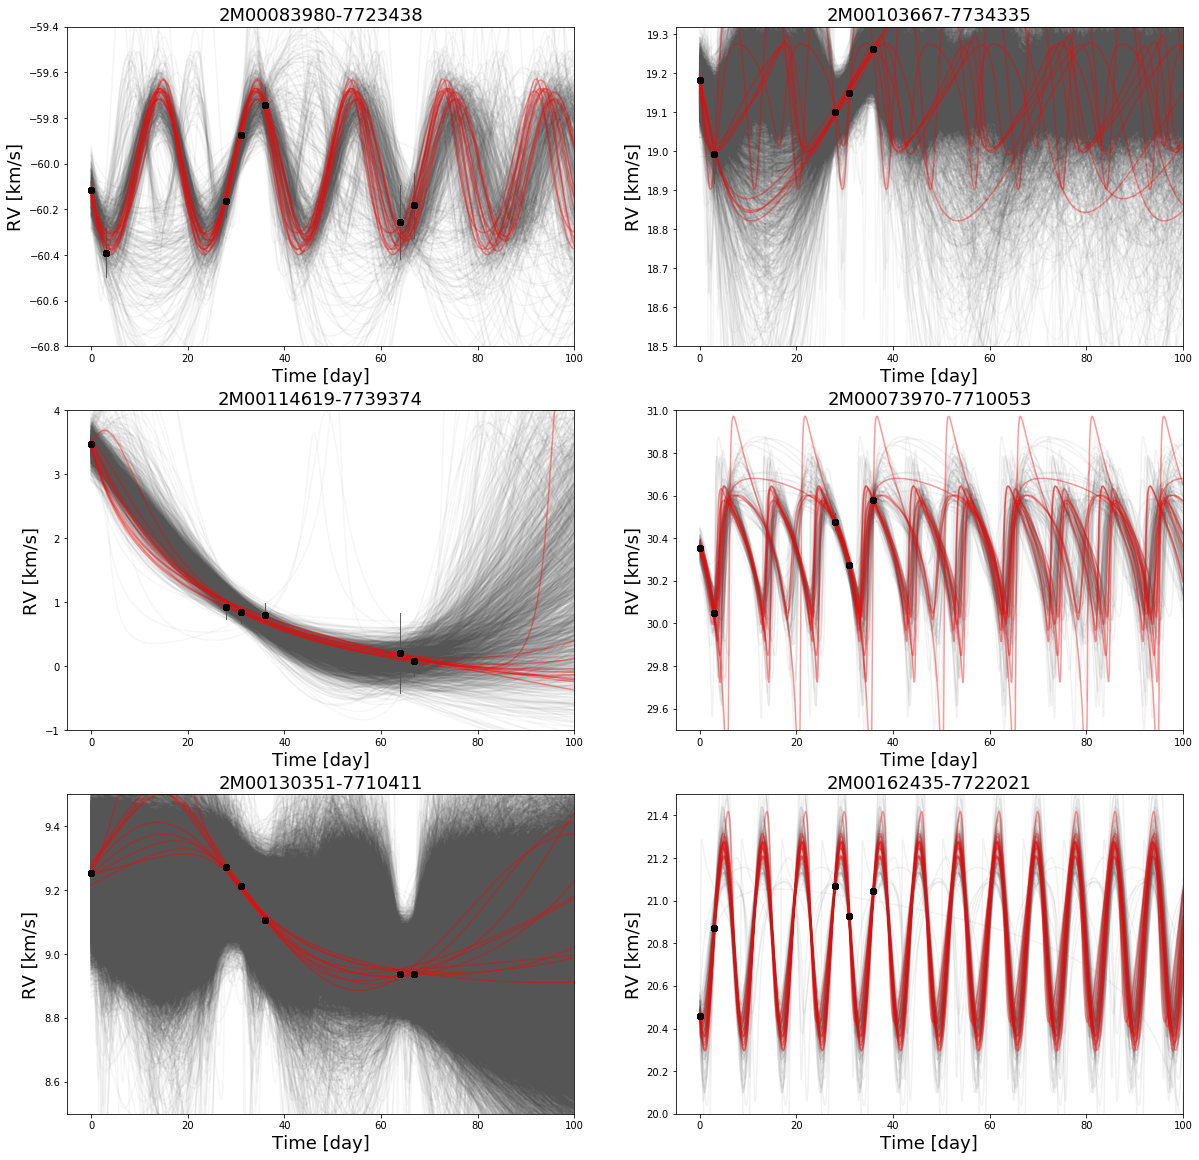

In [259]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (20,20))
ax1 = RV_Plots(Star1_Samples,Star1_Vis,ax1)
ax1.set_ylim(-60.8,-59.4)
ax1.set_title(Star1_Vis['APOGEE_ID'][0],fontsize = 18)
print('Done with 1')
ax2 = RV_Plots(Star2_Samples,Star2_Vis,ax2)
ax2.set_ylim(18.5,19.32)
ax2.set_title(Star2_Vis['APOGEE_ID'][0],fontsize = 18)
print('Done with 2')
ax3 = RV_Plots(Star3_Samples,Star3_Vis,ax3)
ax3.set_ylim(-1,4)
ax3.set_title(Star3_Vis['APOGEE_ID'][0],fontsize = 18)
print('Done with 3')
ax4 = RV_Plots(Star4_Samples,Star4_Vis,ax4)
ax4.set_ylim(29.5,31)
ax4.set_title(Star4_Vis['APOGEE_ID'][0],fontsize = 18)
print('Done with 4')
ax5 = RV_Plots(Star5_Samples,Star5_Vis,ax5)
ax5.set_ylim(8.5,9.5)
ax5.set_title(Star5_Vis['APOGEE_ID'][0],fontsize = 18)
print('Done with 5')
ax6 = RV_Plots(Star6_Samples,Star6_Vis,ax6)
ax6.set_ylim(20,21.5)
ax6.set_title(Star6_Vis['APOGEE_ID'][0],fontsize = 18)

fig.savefig('/home/cody/Math Methods(PHSY 567)/Final Paper/RV Curves Plots.png')

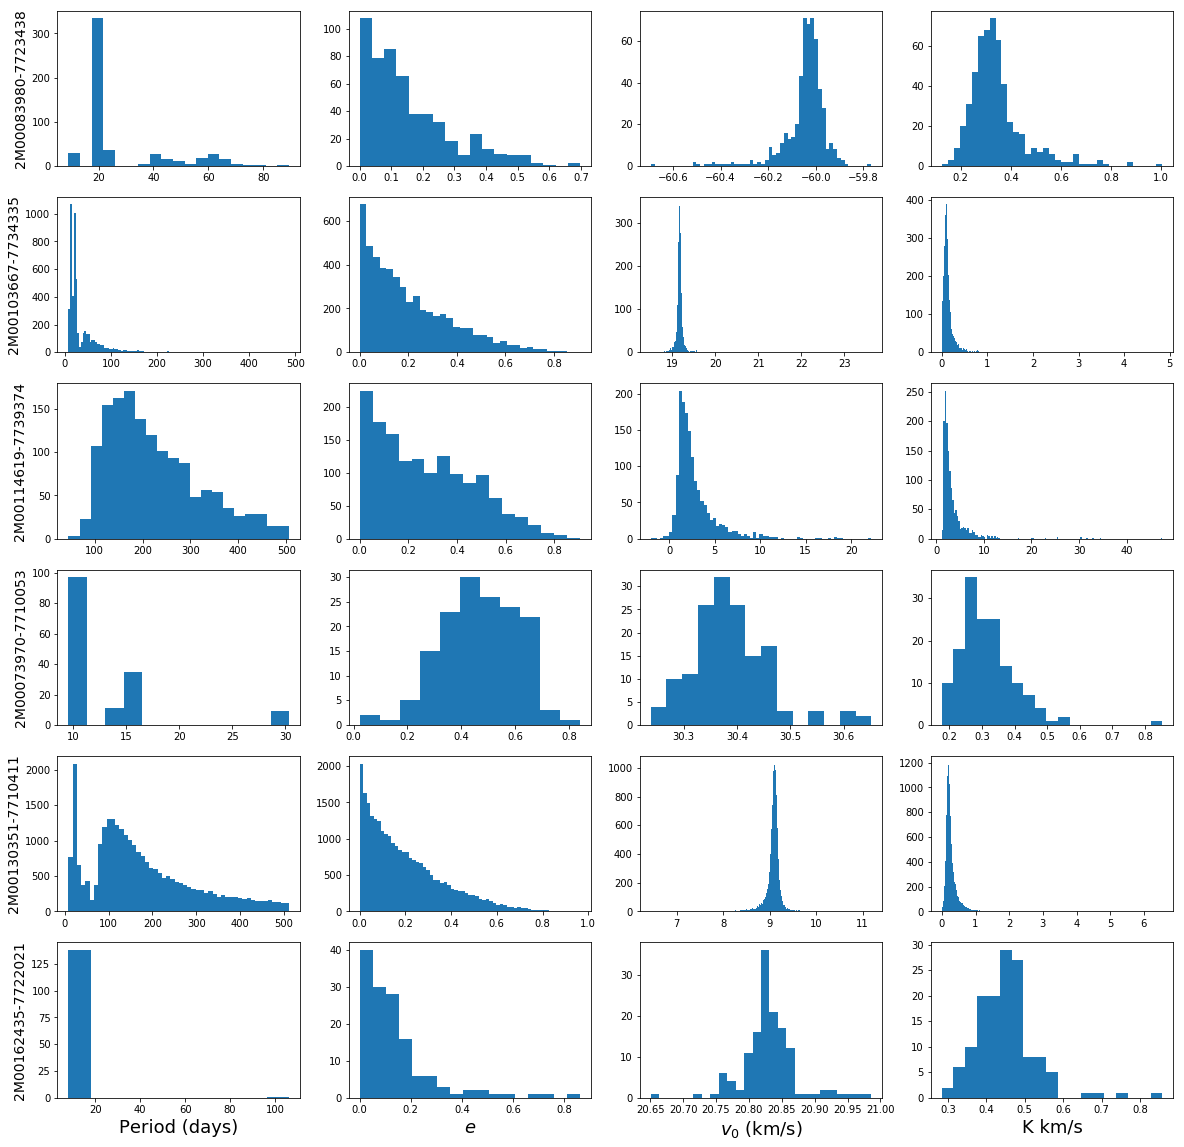

In [312]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),
      (ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),(ax21,ax22,ax23,ax24)) = plt.subplots(6,4,figsize = (20,20))
ax1.hist(Star1_Samples['P'], bins = 'auto')
ax1.set_ylabel(Star1_Vis["APOGEE_ID"][0],fontsize = 14)
ax2.hist(Star1_Samples['e'], bins = 'auto')
ax3.hist(Star1_Samples['v0'], bins = 'auto')
ax4.hist(Star1_Samples['K'], bins = 'auto')

ax5.hist(Star2_Samples['P'], bins = 'auto')
ax5.set_ylabel(Star2_Vis["APOGEE_ID"][0],fontsize = 14)
ax6.hist(Star2_Samples['e'], bins = 'auto')
ax7.hist(Star2_Samples['v0'], bins = 'auto')
ax8.hist(Star2_Samples['K'], bins = 'auto')

ax9.hist(Star3_Samples['P'], bins = 'auto')
ax9.set_ylabel(Star3_Vis["APOGEE_ID"][0], fontsize = 14)
ax10.hist(Star3_Samples['e'], bins = 'auto')
ax11.hist(Star3_Samples['v0'], bins = 'auto')
ax12.hist(Star3_Samples['K'], bins = 'auto')

ax13.hist(Star4_Samples['P'], bins = 'auto')
ax13.set_ylabel(Star4_Vis["APOGEE_ID"][0], fontsize = 14)
ax14.hist(Star4_Samples['e'], bins = 'auto')
ax15.hist(Star4_Samples['v0'], bins = 'auto')
ax16.hist(Star4_Samples['K'], bins = 'auto')

ax17.hist(Star5_Samples['P'], bins = 'auto')
ax17.set_ylabel(Star5_Vis["APOGEE_ID"][0], fontsize = 14)
ax18.hist(Star5_Samples['e'], bins = 'auto')
ax19.hist(Star5_Samples['v0'], bins = 'auto')
ax20.hist(Star5_Samples['K'], bins = 'auto')

ax21.hist(Star6_Samples['P'])
ax21.set_xlabel('Period (days)', fontsize = 18)
ax21.set_ylabel(Star6_Vis["APOGEE_ID"][0],fontsize = 14)
ax22.hist(Star6_Samples['e'], bins = 'auto')
ax22.set_xlabel('$e$',fontsize = 18)
ax23.hist(Star6_Samples['v0'], bins = 'auto')
ax23.set_xlabel('$v_0$ (km/s)',fontsize = 18)
ax24.hist(Star6_Samples['K'], bins = 'auto')
ax24.set_xlabel('K km/s',fontsize = 18)
plt.show()
fig.savefig('/home/cody/Math Methods(PHSY 567)/Final Paper/PEVK histogram.png')

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.00194784,  17.82741406,  27.65288028,  37.4783465 ,
         47.30381272,  57.12927894,  66.95474517,  76.78021139,
         86.60567761,  96.43114383, 106.25661005]),
 <a list of 10 Patch objects>)

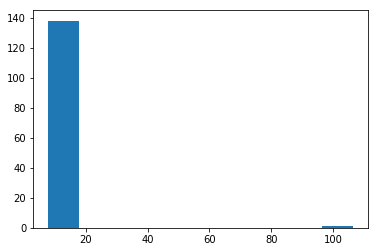

In [305]:
plt.hist(Star6_Samples['P'])

In [318]:
asini = (Star1_Samples['K']*Star1_Samples['P'])/(2*np.pi)*np.sqrt(1 - (Star1_Samples['e'])**2)
mass_func = 4*np.pi**2 *(asini**3 / (G*Star1_Samples['P']) )

<function matplotlib.pyplot.show>

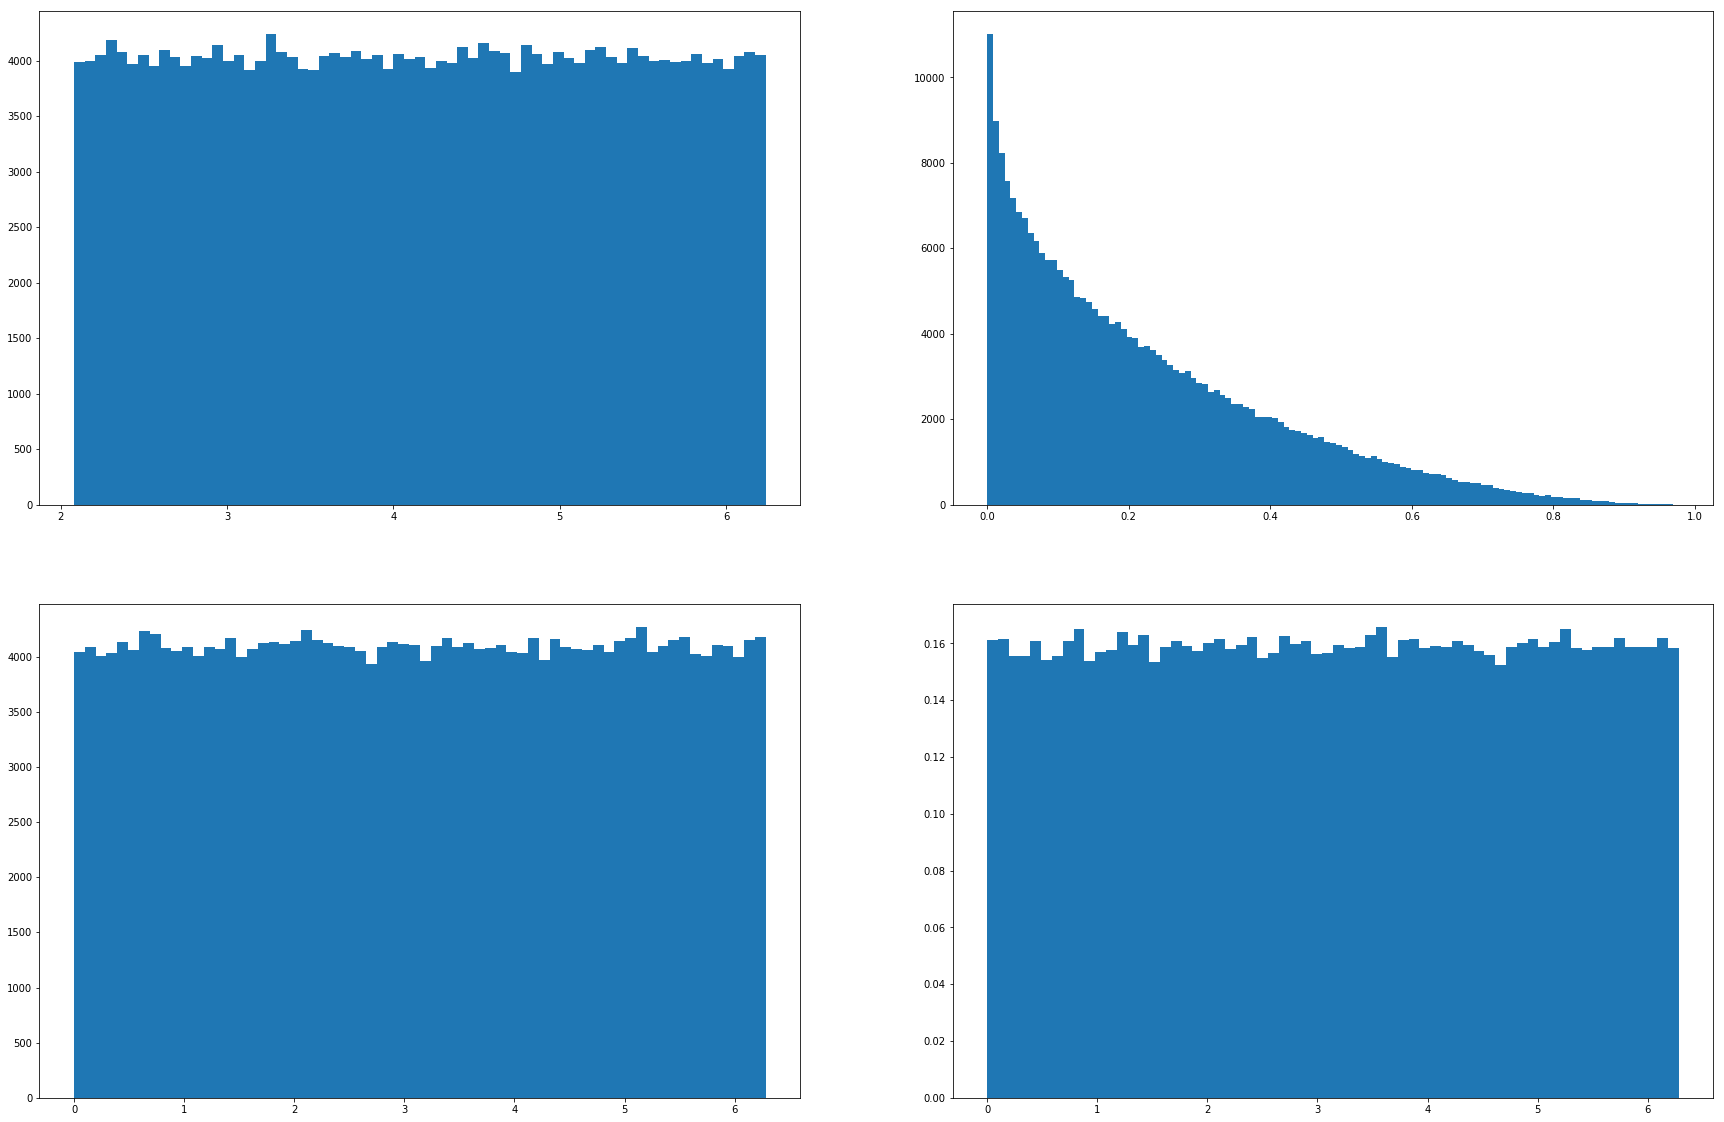

In [73]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (30,20))
ax1.hist(P_foo, bins = 'auto')
ax2.hist(e_foo, bins = 'auto')
ax3.hist(w_foo,bins = 'auto')
ax4.hist(phi_foo,bins = 'auto',normed= True)
plt.show

2.0794415416798357